In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import yt
from yt import YTArray
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
from mpl_toolkits.axes_grid1 import make_axes_locatable

/home/bego/anaconda3/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/bego/.config/yt/ytrc is deprecated in favor of /home/bego/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/GalaDyn/Figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

In [3]:


def process_data_to_plot(data, data_mode, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])

    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)/modo
    if data_mode == "disk":
        return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],amp.T, phase.T
    
    elif data_mode == "acceleration":
        return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],amp.T, phase.T
    
    else:
        print("Only 'disk' or 'acceleration' data modes")


def plot_fourierogram_mode0(data, etiqueta, vmin, vmax, nbins, data_mode):
    fig, ax = plt.subplots(nrows=1,ncols =1 , sharex = True,sharey = True,  figsize=(7,2))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data, data_mode = data_mode, modo=0, nbins=nbins)
    if data_mode == "acceleration":
        im0 = ax.pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax =vmax, cmap = "inferno")
    elif data_mode == "disk":
        im0 = ax.pcolormesh(lookback,rcenters,amplitude, vmin = vmin , vmax =vmax, cmap = "inferno")
        
    
    plt.xlim(6.3,0)
    
    
    plt.subplots_adjust(left=0 ,bottom= 0.03, right=0.9, top=0.95, wspace=0.02, hspace= 0.13)

    fig.colorbar(im0, ax=ax, label = "log $A_{0}$",aspect=15,pad = 0.01)
    
    plt.show()
    
    plt.close()
    
def plot_fourierogram_single_mode(data,etiqueta, vmin, vmax, nbins, data_mode, mode):
    fig, ax = plt.subplots(nrows=1,ncols =1 , sharex = True,sharey = True,  figsize=(7,2))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data, data_mode = data_mode, modo=mode, nbins=nbins)
    if data_mode == "acceleration":
        im0 = ax.pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax =vmax, cmap = "inferno")
    elif data_mode == "disk":
        im0 = ax.pcolormesh(lookback,rcenters,np.log10(amplitude), vmin = vmin , vmax =vmax, cmap = "inferno")
        
    
    plt.xlim(6.3,0)
    
    
    plt.subplots_adjust(left=0 ,bottom= 0.03, right=0.9, top=0.95, wspace=0.02, hspace= 0.13)

    fig.colorbar(im0, ax=ax, label = "log $A_{0}$",aspect=15,pad = 0.01)
    
    plt.show()
    
    plt.close()
    
def plot_fourierogram(data, etiqueta, vmin, vmax, nbins, data_mode ):
    
    
    fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data, data_mode = data_mode, modo=1, nbins=nbins)
    if data_mode == "acceleration":
        im0 = ax[0,0].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax =vmax, cmap = "inferno")
    elif data_mode == "disk":
        print(amplitude)
        im0 = ax[0,0].pcolormesh(lookback,rcenters,np.log10(amplitude), vmin = vmin, vmax =vmax, cmap = "inferno")
    im1 = ax[1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,0].set_title(f"{etiqueta} $m=1$")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data, data_mode = data_mode, modo=2, nbins=nbins)
    if data_mode == "acceleration":
        im00 = ax[0,1].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,40)
    elif data_mode == "disk":
        im00 = ax[0,1].pcolormesh(lookback,rcenters,np.log10(amplitude), vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,22)
    #im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
    im11 = ax[1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,1].set_title(f"{etiqueta} $m=2$")

    lookback, rcenters, amplitude, phase = process_data_to_plot(data,data_mode = data_mode,modo=3, nbins=nbins)
    if data_mode == "acceleration":
        im00 = ax[0,2].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,40)
    elif data_mode == "disk":
        im00 = ax[0,2].pcolormesh(lookback,rcenters,np.log10(amplitude), vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,22)
    #im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
    im11 = ax[1,2].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,2].set_title(f"{etiqueta} $m=3$")
    
    
    
    
    plt.xlim(6.3,0)
    
    
    plt.subplots_adjust(left=0 ,bottom= 0.03, right=0.9, top=0.95, wspace=0.02, hspace= 0.13)

    fig.colorbar(im0, ax=ax[0], label = "log $A_{m}$",aspect=15,pad = 0.01)
    fig.colorbar(im1, ax=ax[1], label= "$\phi_{max}$",aspect=15,pad = 0.01)


    ax[1,1].set_xlabel("$t_{\mathrm{lookback}}$ [Gyr]", fontsize = 12)
    ax[1,0].set_xlabel("$t_{\mathrm{lookback}}$ [Gyr]", fontsize = 12)
    ax[1,2].set_xlabel("$t_{\mathrm{lookback}}$ [Gyr]", fontsize = 12)
    ax[0,0].set_ylabel("R [kpc]", fontsize = 12)
    ax[1,0].set_ylabel("R [kpc]", fontsize = 12)
  #  plt.show()
    #plt.savefig(path_figures +f"{etiqueta}_fourier_complete.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
#    plt.shoW()
        #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))

In [25]:
density

,snapshot_t,lookbacktime,Rcenters,Nparticles,amp0,amp1,amp2,amp3,amp4,phase0,phase1,phase2,phase3,phase4
0,600.0,6.323182,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,600.0,6.323182,1.5,37571.0,153192340.0,2878014.8,56700572.0,2507384.0,5103090.5,0.0,1.571955,1.673648,-2.547896,-2.191612
2,600.0,6.323182,2.5,41015.0,189682850.0,7012881.0,61908596.0,3300597.0,13658894.0,0.0,1.087544,1.894006,2.460069,-2.996705
3,600.0,6.323182,3.5,36141.0,185129540.0,3808412.0,36787700.0,2202379.5,8410002.0,0.0,2.798407,0.993588,2.135118,-2.261304
4,600.0,6.323182,4.5,42438.0,220578430.0,7743159.5,67020092.0,6602902.5,16807090.0,0.0,-1.494351,0.941721,-2.200265,1.652065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,999.0,0.013209,17.5,34493.0,159087710.0,76983210.0,10409966.0,2462333.8,2646097.5,0.0,0.013648,0.794158,-1.602257,-2.372022
4198,999.0,0.013209,18.5,28166.0,127854900.0,55303890.0,8425232.0,6461316.5,5633253.5,0.0,-0.335958,0.125169,-0.325100,1.436397
4199,999.0,0.013209,19.5,21035.0,94296130.0,34154580.0,4311751.0,4591057.5,12121423.0,0.0,-0.812519,1.363269,0.831599,2.271797
4200,999.0,0.013209,20.5,13798.0,62122116.0,23814442.0,4884605.0,2527085.2,6052547.5,0.0,-1.197137,-2.840291,1.825754,3.082092


Mode 0!


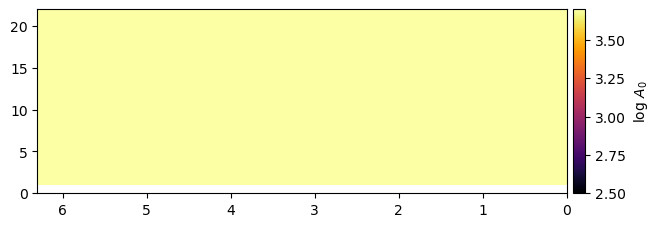

[[          nan           nan           nan ...           nan
            nan           nan]
 [  76.60202816  114.0979087    50.48240944 ...   56.68681912
   115.58248133   28.8023503 ]
 [ 170.98332317  181.54783724   95.31713735 ...   67.21559266
    40.40940941    7.44616008]
 ...
 [4545.76866506 4380.89151849 3862.72623494 ... 1685.74578482
  1747.98457906 1623.70240076]
 [6244.33013306 6028.36077627 5341.19242724 ... 1822.77657736
  1918.08887615 1725.93433831]
 [6562.41512346 7064.84969495 6766.12837838 ... 1784.67674233
  1593.27530134 1716.40307209]]


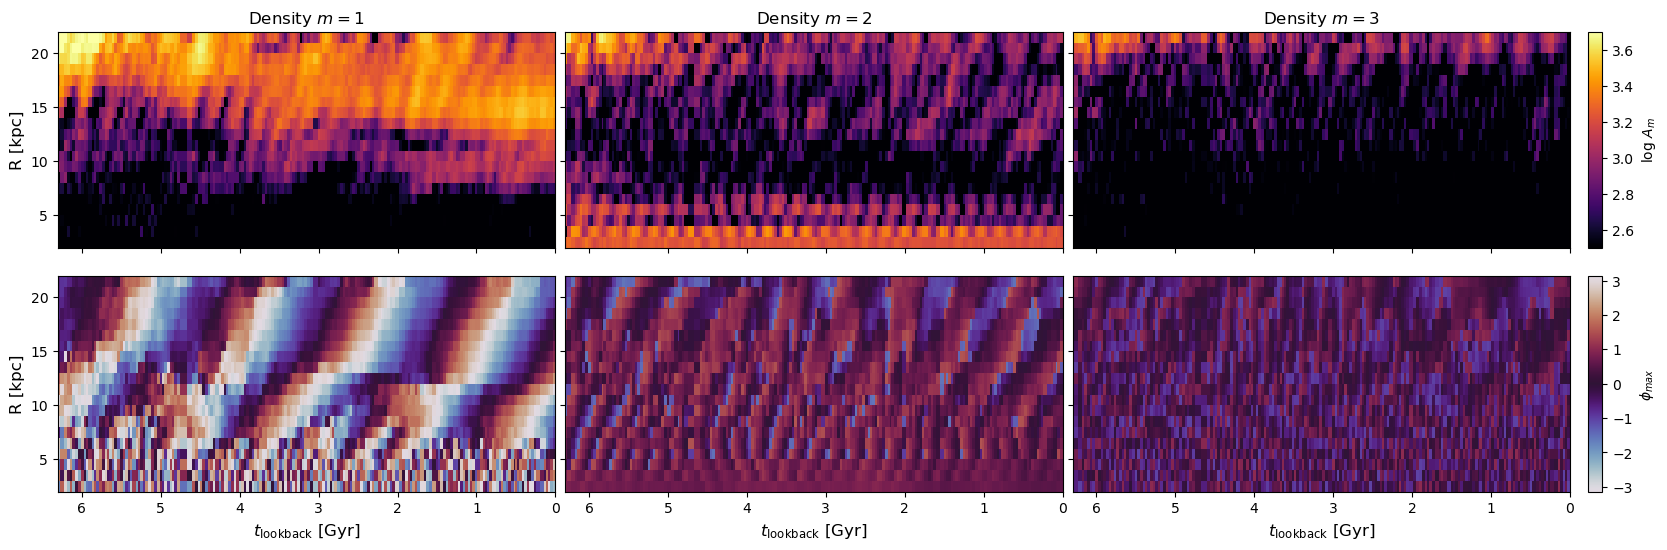

In [26]:
density = pd.read_csv(path_results + f"disc/fourier_22_Mass_disc_a2_since_merger.csv", sep = ",")
plot_fourierogram_mode0(density, etiqueta="Density",vmin = 2.5, vmax = 3.7, nbins=22, data_mode = "disk")
plot_fourierogram(density, etiqueta="Density",vmin = 2.5, vmax = 3.7, nbins=22, data_mode = "disk")

Mode 0!


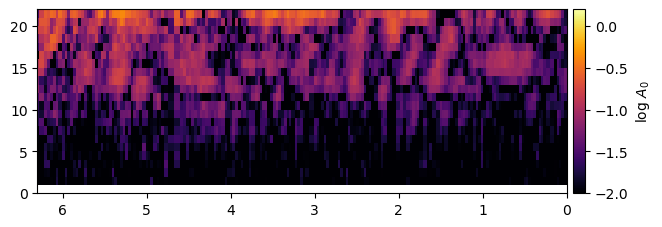

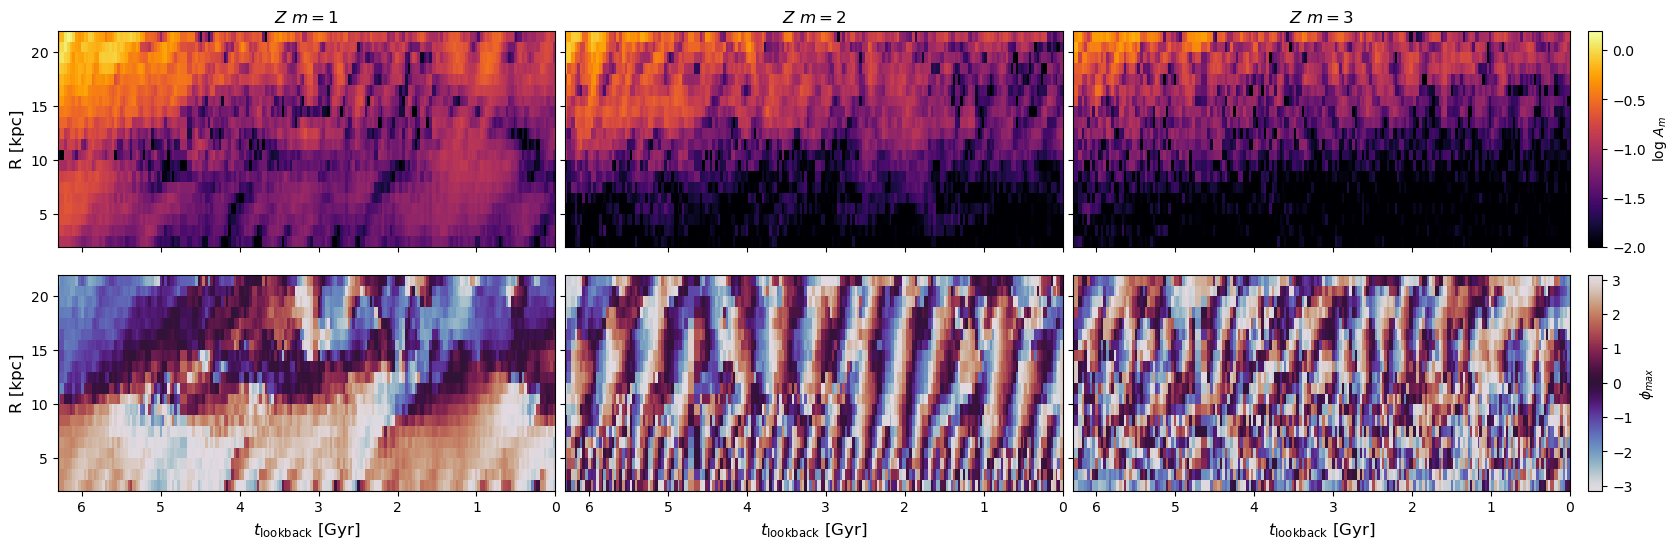

In [16]:
z = pd.read_csv(path_results + f"disc/fourier_22_Z_disc_a2.csv", sep = ",")
plot_fourierogram_mode0(z,etiqueta="$Z$",vmin = -2, vmax = 0.2, nbins=22, data_mode = "disk")
plot_fourierogram(z,etiqueta="$Z$",vmin = -2, vmax = 0.2, nbins=22, data_mode = "disk")

Mode 0!


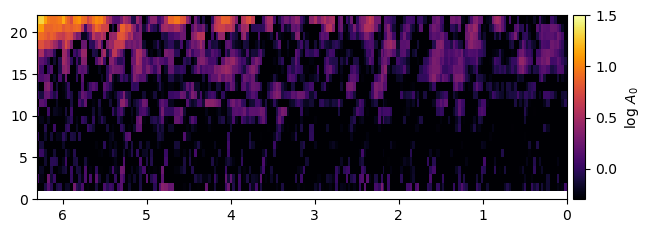

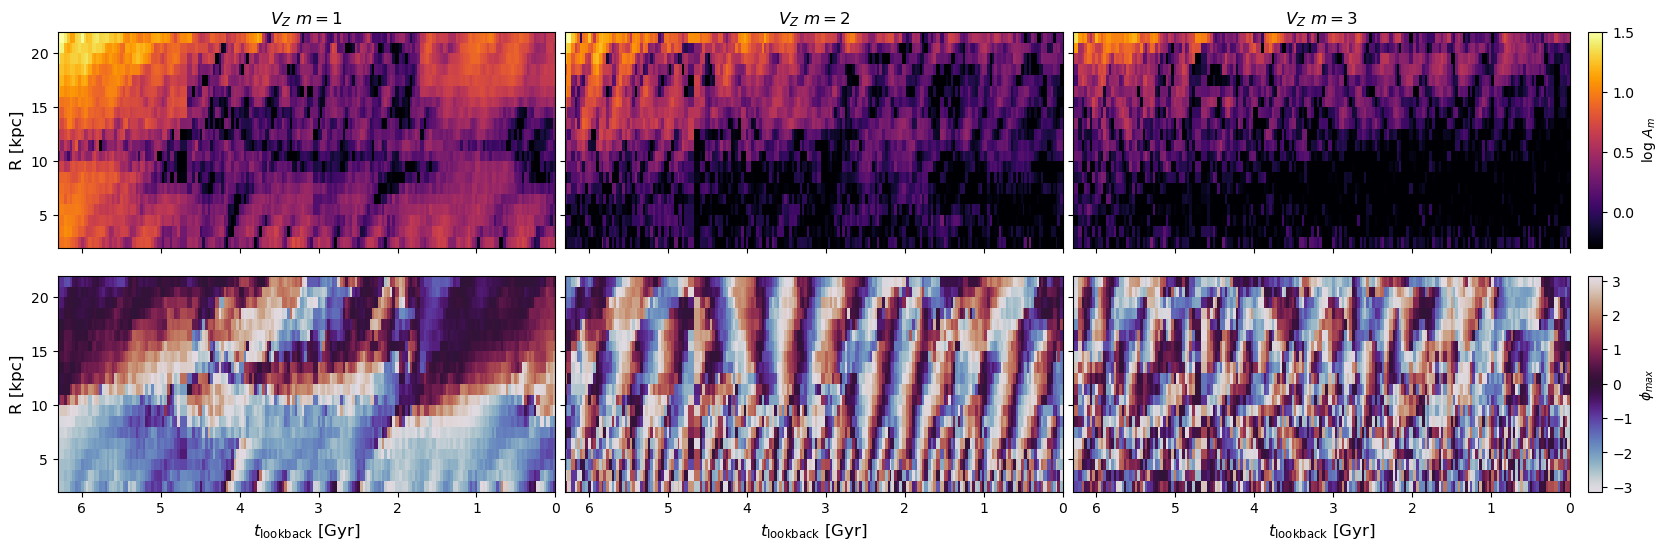

In [17]:
vz = pd.read_csv(path_results + f"disc/fourier_22_VZ_disc_a2.csv", sep = ",")
plot_fourierogram_mode0(vz, etiqueta="$V_{Z}$",vmin = -0.3, vmax = 1.5,  nbins=22,data_mode = "disk")
plot_fourierogram(vz, etiqueta="$V_{Z}$",vmin = -0.3, vmax = 1.5,  nbins=22,data_mode = "disk")

Mode 0!


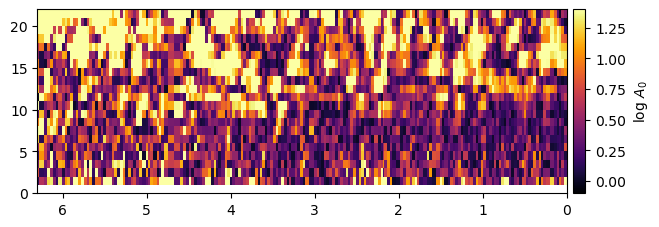

[[        nan         nan         nan ...         nan         nan
          nan]
 [ 4.66815077  3.81000057  2.09450786 ...  2.91128442  2.72786617
   1.92621708]
 [ 7.05942667  9.46846    10.24099556 ...  4.46776167  3.1549875
   3.41626833]
 ...
 [19.03767382 17.03522807 14.93900573 ...  4.15300164  3.87192969
   4.46766509]
 [15.99445966 16.6517312  13.35548683 ...  4.77186709  5.07919791
   4.33044035]
 [13.6901206  15.06089091 13.64382024 ...  4.94801119  4.75486914
   4.53837243]]


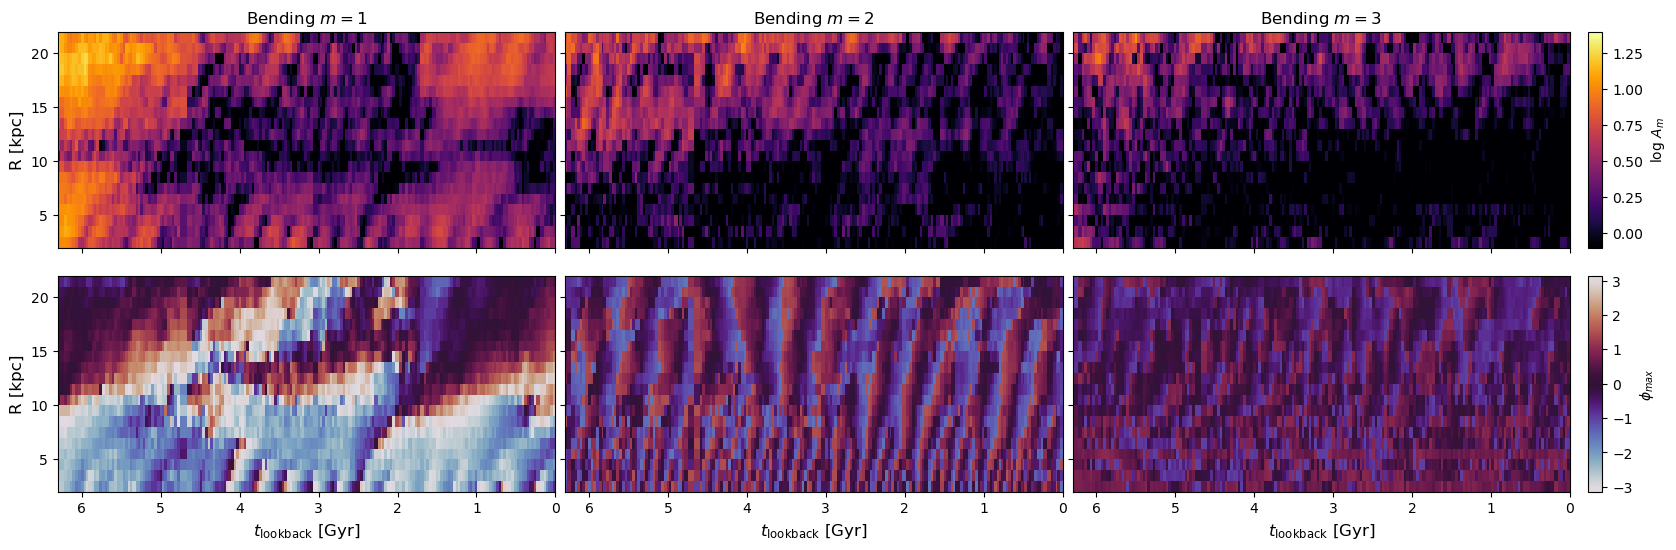

In [27]:
B = pd.read_csv(path_results +  f"disc/fourier_22_bending_since_merger_.csv", sep = ",")
plot_fourierogram_mode0(B, etiqueta="Bending",vmin = -0.1,vmax= 1.4, nbins=22, data_mode = "disk")
plot_fourierogram(B, etiqueta="Bending",vmin = -0.1,vmax= 1.4, nbins=22, data_mode = "disk")

Mode 0!


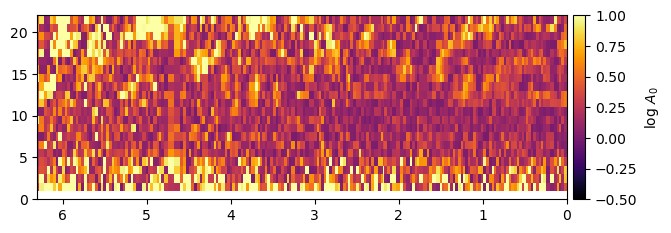

[[       nan        nan        nan ...        nan        nan        nan]
 [3.83564638 2.89567857 1.316814   ... 2.39466967 3.60263917 1.71769633]
 [0.56128861 1.05488217 0.68424506 ... 0.40041606 0.86888069 1.386414  ]
 ...
 [3.3649685  2.70950395 1.41591264 ... 0.82544062 0.65363266 0.8071819 ]
 [0.70472937 2.2949047  1.35475844 ... 1.61247363 1.14621954 1.1342783 ]
 [0.73149109 2.24394848 0.8597131  ... 0.6968928  0.86284379 1.13702585]]


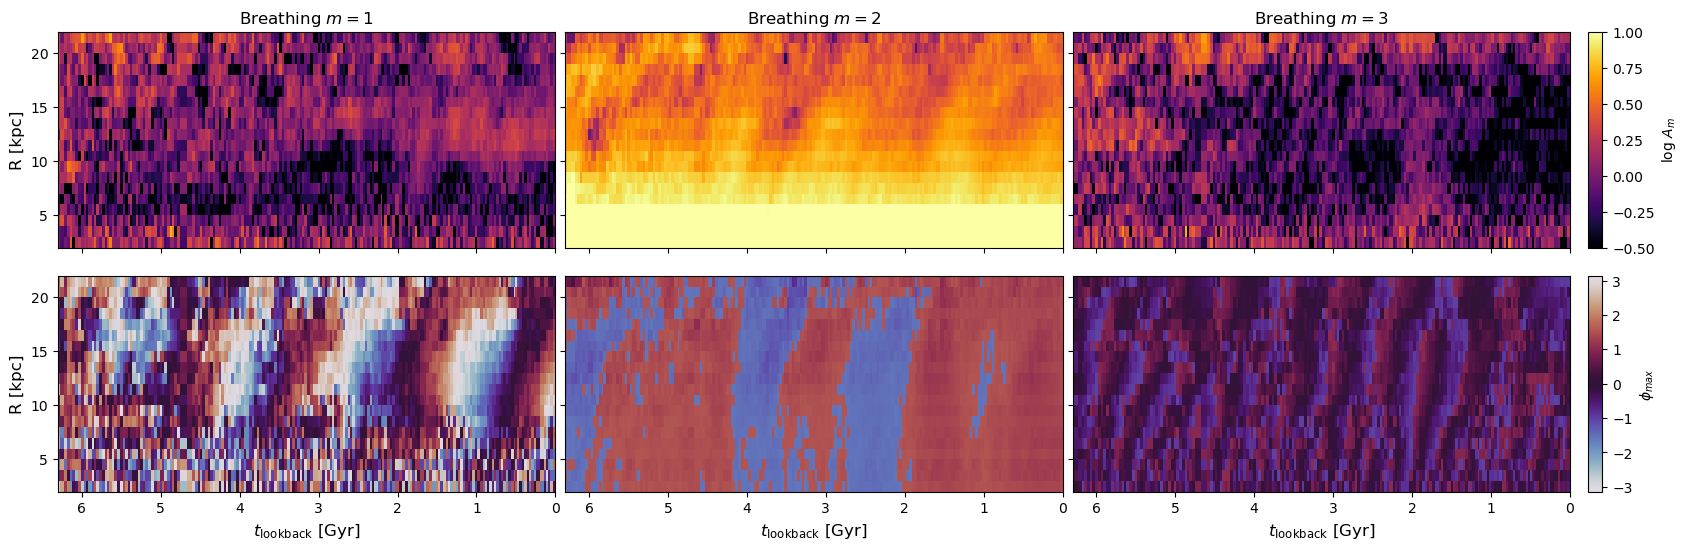

In [9]:
A = pd.read_csv(path_results +  f"disc/fourier_22_breathing_since_merger_.csv", sep = ",")
plot_fourierogram_mode0(A, etiqueta="Breathing",vmin = -0.5,vmax= 1., nbins=22, data_mode = "disk")
plot_fourierogram(A, etiqueta="Breathing",vmin = -0.5,vmax= 1., nbins=22, data_mode = "disk")

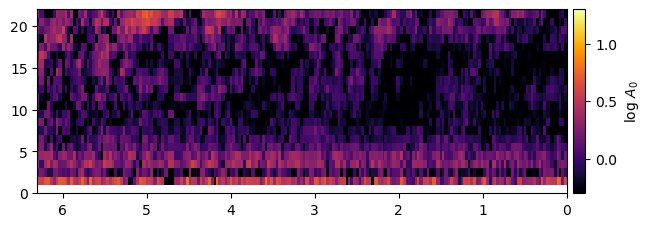

In [6]:
A = pd.read_csv(path_results + f"disc/fourier_22_breathing_re_.csv", sep = ",")
plot_fourierogram_single_mode(A, etiqueta="Breathing",vmin = -0.3,vmax= 1.3, nbins=22, data_mode = "disk", mode = 4)

Mode 0!


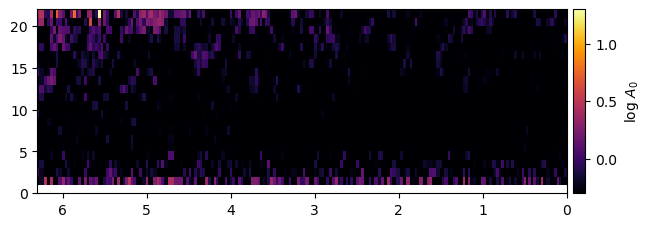

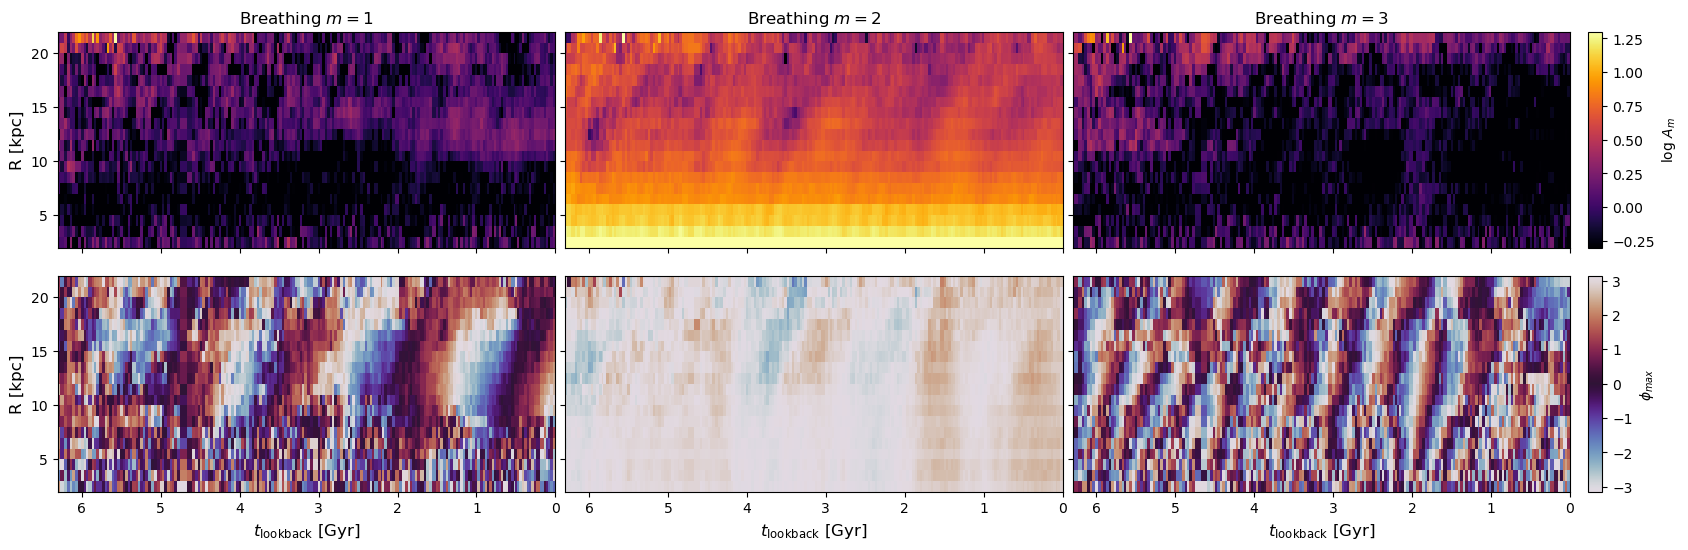

In [19]:
A = pd.read_csv(path_results + f"disc/fourier_22_breathing_.csv", sep = ",")
plot_fourierogram_mode0(A, etiqueta="Breathing",vmin = -0.3,vmax= 1.3, nbins=22, data_mode = "disk")
plot_fourierogram(A, etiqueta="Breathing",vmin = -0.3,vmax= 1.3, nbins=22, data_mode = "disk")

Mode 0!


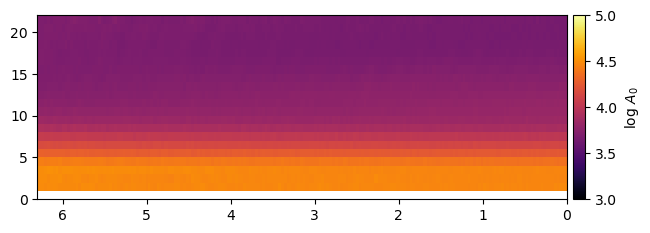

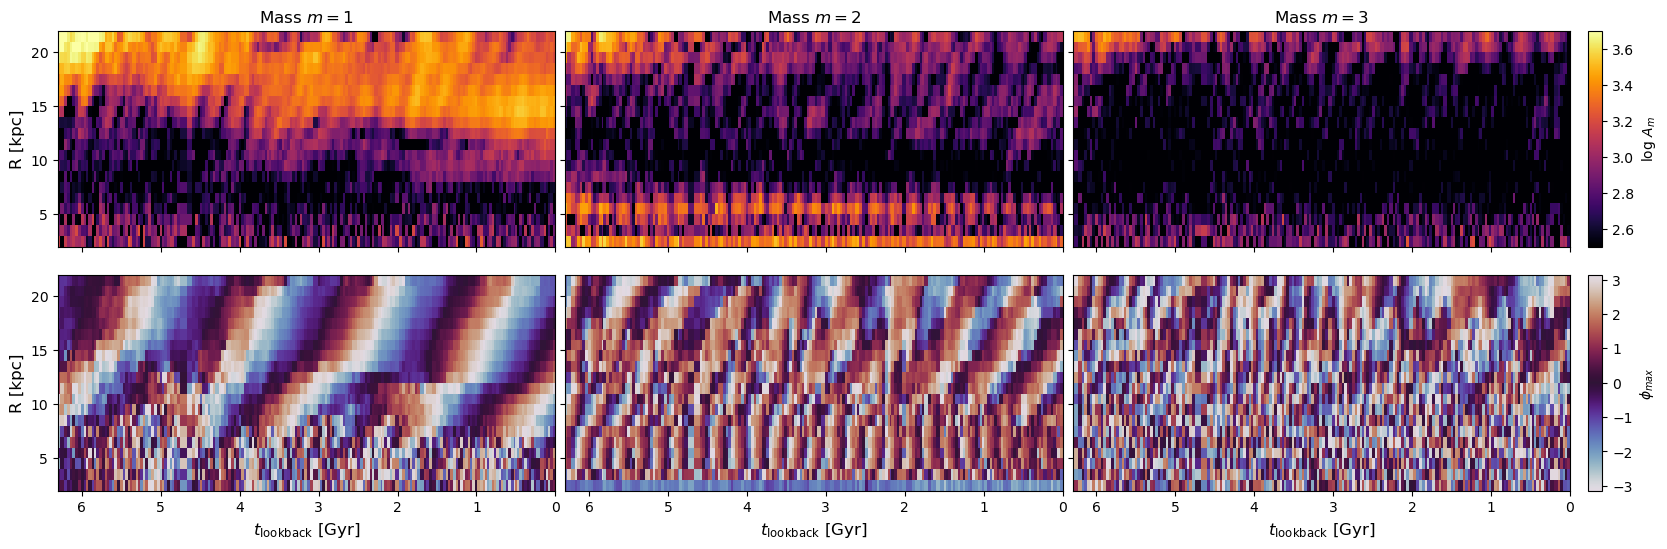

In [13]:
mass = pd.read_csv(path_results + f"disc/fourier_22_Mass_disc_a2.csv", sep = ",")
plot_fourierogram_mode0(mass, etiqueta="Mass",vmin = 3, vmax = 5, nbins=22, data_mode = "disk")
plot_fourierogram(mass, etiqueta="Mass",vmin = 2.5, vmax = 3.7, nbins=22, data_mode = "disk")

Mode 0!


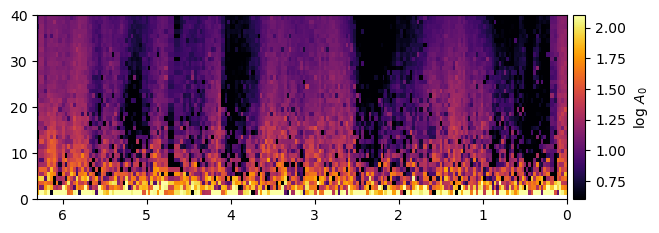

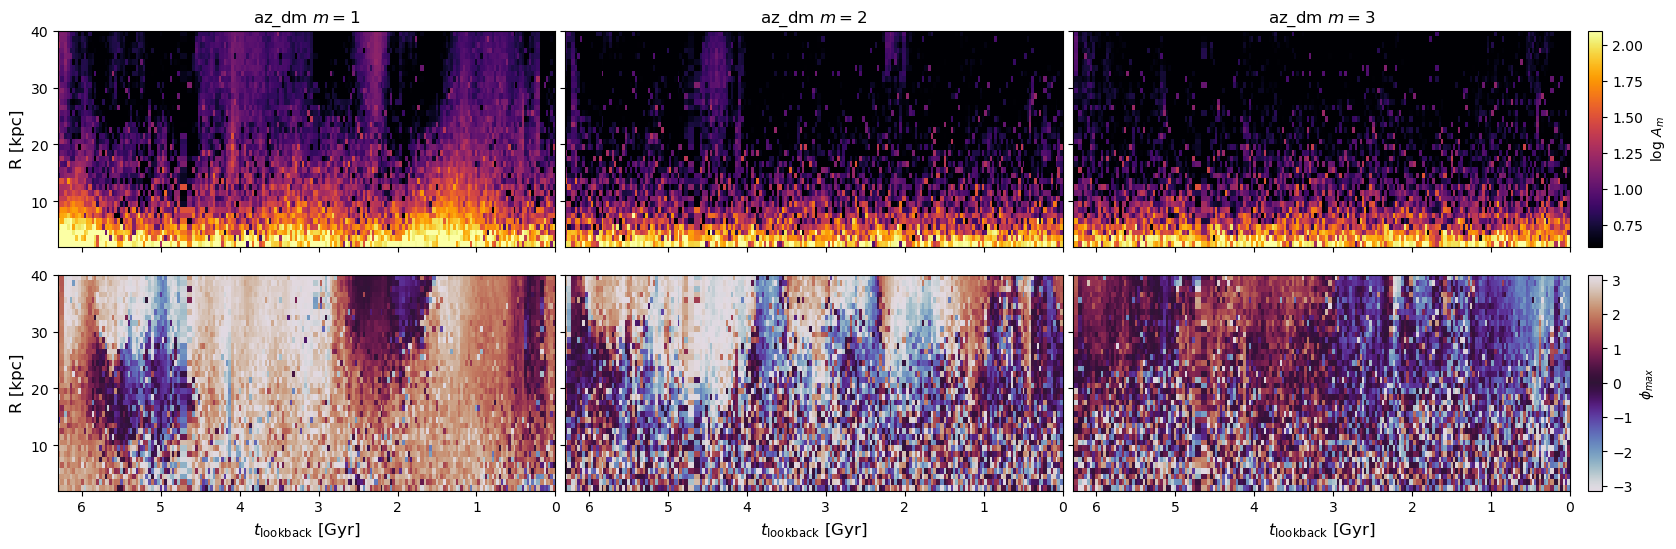

In [20]:
az_dm = pd.read_csv(path_results + f"accelerations/fourier_40_az_acceleration_dm.csv", sep = ",")
plot_fourierogram_mode0(az_dm, etiqueta="az_dm",vmin = 0.60, vmax =2.1, nbins=40, data_mode = "acceleration")
plot_fourierogram(az_dm, etiqueta="az_dm",vmin = 0.60, vmax =2.1, nbins=40, data_mode = "acceleration")

Mode 0!


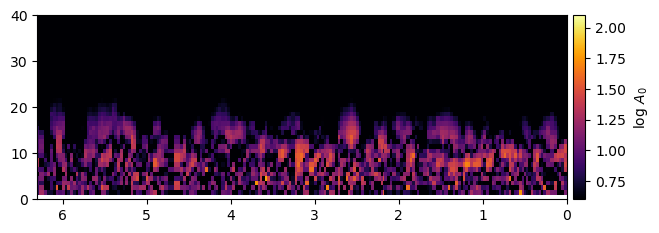

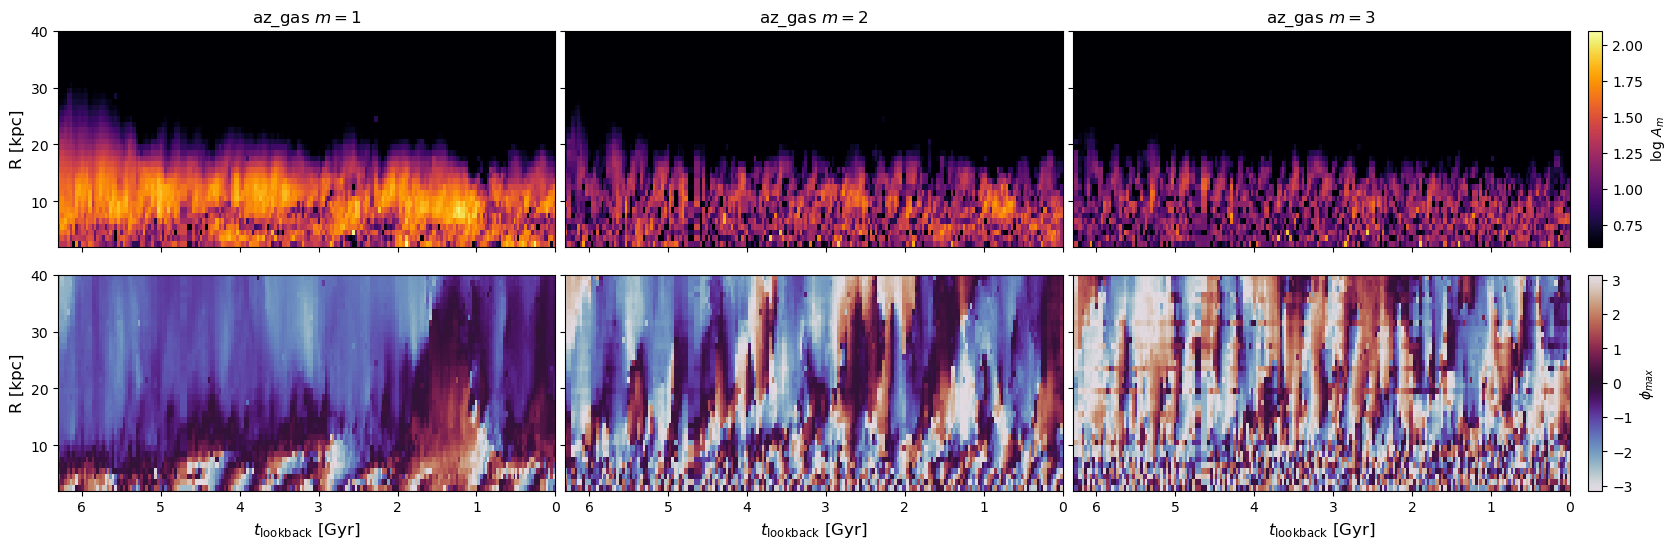

In [21]:
az_gas = pd.read_csv(path_results + f"accelerations/fourier_40_az_acceleration_gas.csv", sep = ",")
plot_fourierogram_mode0(az_gas, etiqueta="az_gas",vmin = 0.60, vmax =2.1, nbins=40, data_mode = "acceleration")
plot_fourierogram(az_gas, etiqueta="az_gas",vmin = 0.60, vmax =2.1, nbins=40, data_mode = "acceleration")

In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
   # print(x_vals)
   # print(y_vals)
    plt.plot(x_vals, y_vals, '--', c = "white")
    
def plot_fourierogram_single_phase(data,etiqueta,  nbins, data_mode, mode):
    fig, ax = plt.subplots(nrows=1,ncols =1 , sharex = True,sharey = True,  figsize=(5,1.7))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data, data_mode = data_mode, modo=mode, nbins=nbins)
    im1 = ax.pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")

    abline(-22,95)
    abline(-22,86)
    abline(-22,78)
    
    plt.xlim(5.3,1.7)
    plt.ylim(1,11)
    
    plt.subplots_adjust(left=0 ,bottom= 0.03, right=0.9, top=0.95, wspace=0.02, hspace= 0.13)

    fig.colorbar(im1, ax=ax, label = "$\phi$",aspect=15,pad = 0.01)
    plt.title(etiqueta)
    plt.show()
    
    #plt.close()

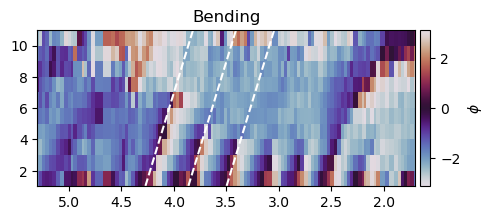

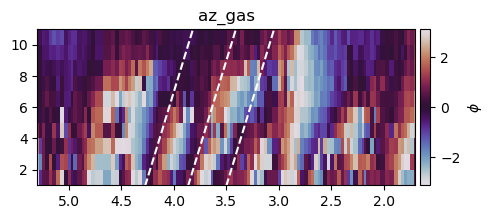

In [148]:

B = pd.read_csv(path_results +  f"disc/fourier_22_bending_since_merger_.csv", sep = ",")


plot_fourierogram_single_phase(B, etiqueta="Bending", nbins=22, data_mode = "disk", mode=1)


B = pd.read_csv(path_results +  f"disc/fourier_22_bending_since_merger_.csv", sep = ",")

az_gas = pd.read_csv(path_results + f"accelerations/fourier_40_az_acceleration_gas.csv", sep = ",")
plot_fourierogram_single_phase(az_gas, etiqueta="az_gas", nbins=40, data_mode = "acceleration", mode=1)